In [2]:
# edit to be a blueprint
# change to predicting y ml only signal day

In [118]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
from tvDatafeed import TvDatafeed, Interval
import config_api
import mplfinance as mpf

In [119]:
user = config_api.tradingview_user
password = config_api.tradingview_password

In [120]:
tv = TvDatafeed(user, password, chromedriver_path= None)

In [121]:
data = tv.get_hist(symbol= 'ADAUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [122]:
data = tv.get_hist(symbol= 'BTCUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [123]:
data = tv.get_hist(symbol= 'XRPUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)
#df = ax

In [124]:
data = tv.get_hist(symbol= 'ETHUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [184]:
df = data.copy()

In [185]:
rsi = df.ta.rsi(length= 14, append= True).name
ma_obv = df.ta.ma_obv(fast= 5, slow= 35, ma_type= 'ema', append= True).name
ma_cross = df.ta.ma_cross(fast= 5, slow= 15, ma_type= 'ema', append= True).name
ema = df.ta.ema(length= 100, append= True).name

In [186]:
help(ta.atr)

Help on function atr in module pandas_ta.volatility.atr:

atr(high, low, close, length=None, mamode=None, talib=None, drift=None, offset=None, **kwargs)
    Average True Range (ATR)
    
    Averge True Range is used to measure volatility, especially volatility caused by
    gaps or limit moves.
    
    Sources:
        https://www.tradingview.com/wiki/Average_True_Range_(ATR)
    
    Calculation:
        Default Inputs:
            length=14, drift=1, percent=False
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        WMA = Weighted Moving Average
        RMA = WildeR's Moving Average
        TR = True Range
    
        tr = TR(high, low, close, drift)
        if 'ema':
            ATR = EMA(tr, length)
        elif 'sma':
            ATR = SMA(tr, length)
        elif 'wma':
            ATR = WMA(tr, length)
        else:
            ATR = RMA(tr, length)
    
        if percent:
            ATR *= 100 / close
    
    Args:
        high (pd.Series):

In [187]:
df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'RSI_14', 'OBV',
       'OBVe_5', 'OBVe_35', 'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15',
       'MAe_5_15_diff', 'EMA_100'],
      dtype='object')

In [188]:
ticker = 'AXS'

In [189]:
# 2018 กราฟลงอย่างเดียว
# 2019 ขึ้น และลงปิดปีลบ # มีsideway, uptrend, downtrend
# 2020 ขึ้น ย่อ ขึ้น
# 2021:2022 มีขึ้นหนัก ลงหนัก

C:\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




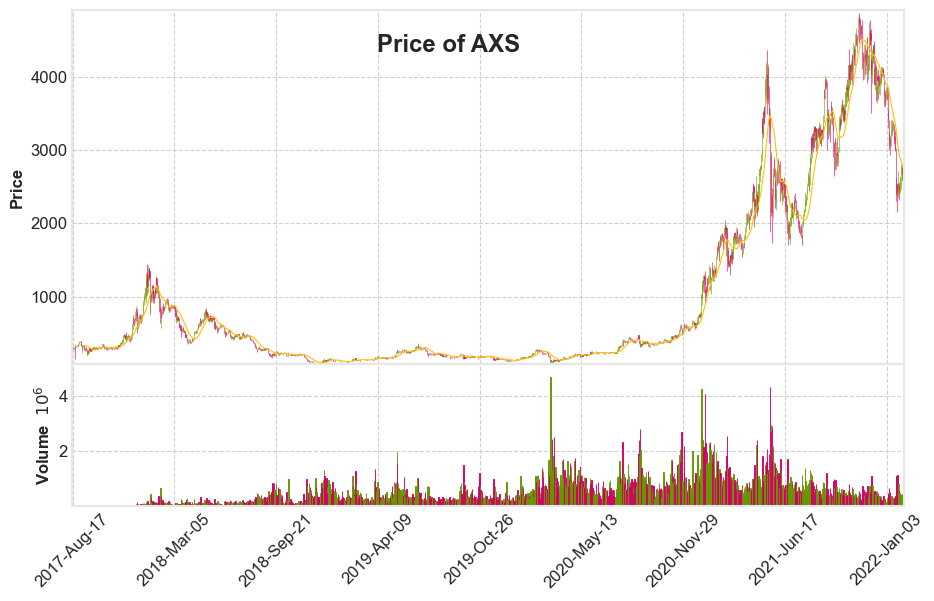

In [190]:
mpf.plot(df, figratio=(10, 6), type='candle', mav=(21), volume=True, title = f'Price of {ticker}', tight_layout=True, style='binance')

In [191]:
def enc_rsi(rsi):
    if rsi > 50:
        return 1
    elif rsi < 50:
        return 0
    # try 66 and 33 / 30 and 70

def enc_maobv(maobv):
    if maobv > 0:
        return 1
    elif maobv < 0:
        return 0

def enc_ma_cross(ma_cross):
    if ma_cross > 0:
        return 1
    elif ma_cross < 0:
        return 0

In [192]:
df['strength'] = df[f'{rsi}'].apply(enc_rsi)
df['vol_in'] = df[f'{ma_obv}'].apply(enc_maobv)
df['ma_cross'] = df[f'{ma_cross}'].apply(enc_ma_cross)
df['price_over_ema'] = df[f'{ema}'] < df['close']

In [193]:
df['signal'] = (df['vol_in'] == 1) & (df['strength'] == 1) & (df['ma_cross'] == 1)

In [194]:
df.loc[df['signal'] == 1]

,symbol,open,high,low,close,volume,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff,EMA_100,strength,vol_in,ma_cross,price_over_ema,signal
datetime,,,,,,,,,,,,,,,,,,,,
2017-10-14 07:00:00,BINANCE:ETHUSDT,337.96,349.80,335.00,342.00,7731.96469,65.175689,6.215449e+03,-6.054124e+03,-6.655545e+03,601.420689,323.759563,309.317649,14.441914,NaN,1.0,1.0,1.0,False,True
2017-10-15 07:00:00,BINANCE:ETHUSDT,342.00,348.00,316.17,337.96,10011.34708,63.174625,-3.795898e+03,-5.301382e+03,-6.496676e+03,1195.293446,328.493042,312.897943,15.595099,NaN,1.0,1.0,1.0,False,True
2017-11-19 07:00:00,BINANCE:ETHUSDT,346.66,373.56,343.07,354.15,19397.74898,66.702407,-3.610420e+04,-5.266346e+04,-5.463076e+04,1967.304742,340.416242,323.409781,17.006461,NaN,1.0,1.0,1.0,False,True
2017-11-20 07:00:00,BINANCE:ETHUSDT,355.15,372.50,353.90,367.42,18277.01940,70.123522,-1.782718e+04,-4.105137e+04,-5.258612e+04,11534.753301,349.417495,328.911058,20.506436,NaN,1.0,1.0,1.0,False,True
2017-11-21 07:00:00,BINANCE:ETHUSDT,367.42,375.50,350.02,362.12,26237.64398,67.155769,-4.406483e+04,-4.205585e+04,-5.211271e+04,10056.861413,353.651663,333.062176,20.589487,NaN,1.0,1.0,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12 07:00:00,BINANCE:ETHUSDT,4719.00,4809.71,4507.85,4665.46,461580.04150,62.054545,6.495988e+07,6.527351e+07,6.486823e+07,405285.005149,4670.440178,4527.735913,142.704265,3634.348209,1.0,1.0,1.0,True,True
2021-11-13 07:00:00,BINANCE:ETHUSDT,4665.47,4707.60,4584.08,4644.28,220720.66110,61.114396,6.473916e+07,6.509540e+07,6.486106e+07,234337.635240,4661.720119,4542.303924,119.416195,3654.346858,1.0,1.0,1.0,True,True
2021-11-14 07:00:00,BINANCE:ETHUSDT,4644.27,4696.05,4514.12,4626.50,245309.06740,60.288645,6.449385e+07,6.489488e+07,6.484066e+07,54223.112589,4649.980079,4552.828434,97.151646,3673.597415,1.0,1.0,1.0,True,True


In [195]:
df['action_price'] = df['open'].shift(-1)

In [196]:
df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'RSI_14', 'OBV',
       'OBVe_5', 'OBVe_35', 'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15',
       'MAe_5_15_diff', 'EMA_100', 'strength', 'vol_in', 'ma_cross',
       'price_over_ema', 'signal', 'action_price'],
      dtype='object')

In [197]:
df_encoded = df[['open', 'close', 'action_price', rsi, 'OBV', 'OBVe_5', 'OBVe_35', ma_obv, 'MAe_5', 'MAe_15',
       'MAe_5_15_diff', ema, 'price_over_ema', 'strength', 'vol_in', 'ma_cross', 'signal']]

In [198]:
#df_encoded.loc[(df_encoded['vol_in'] == 1) & (df_encoded['strength'] == 1)]

In [199]:
df_encoded.ta.tsignals(df_encoded['signal'], asbool= True, append= True)

C:\Anaconda3\lib\site-packages\pandas_ta\core.py:420: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2017-08-17 07:00:00,False,0,False,False
2017-08-18 07:00:00,False,0,False,False
2017-08-19 07:00:00,False,0,False,False
2017-08-20 07:00:00,False,0,False,False
2017-08-21 07:00:00,False,0,False,False
...,...,...,...,...
2022-02-02 07:00:00,False,0,False,False
2022-02-03 07:00:00,False,0,False,False
2022-02-04 07:00:00,False,0,False,False


In [200]:
df_encoded['1d_ret'] = df_encoded['action_price'].pct_change(1).shift(-1)
df_encoded['good_signal'] = df_encoded['1d_ret'] > -0.00 
# เพิ่มความยืดหยุ่นให้กับ วันที่เปิดออเดอร์ แล้ววันต่อมา ราคาลงนิดหน่อยก็ไม่เป็นไร ต้องลงเยอะๆถึงนับว่าเป็น false signal

In [201]:
#### get only signal = True, as primary filter to train data
#df_signal = df_encoded.loc[df_encoded['TS_Trends'] == 1]

In [202]:
#### get only action day
df_encoded = df_encoded.loc[df_encoded['TS_Trades'] != 0]#.loc[df_encoded['action_price']].pct_change()

In [203]:
df_encoded['trade_ret'] = df_encoded['action_price'].pct_change()

<ipython-input-203-a348f6391013>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [204]:
#### check about how many days that price goes down can indicate trading loss (and prob correct)

n_day_loss_and_1d_loss  = len(df_encoded.loc[(df_encoded['1d_ret'] < 0) & (df_encoded['trade_ret'] < 0) & (df_encoded['TS_Trades'] == 1)])
n_trade_loss = len(df_encoded.loc[(df_encoded['trade_ret'] < 0) & (df_encoded['TS_Trades'] == 1)] )
print(f'n day that 1d_ret can indicate trade loss: {n_day_loss_and_1d_loss}, total n of trade lose: {n_trade_loss}')
print(f'prob to indicate trade loss from  1d_ret: {n_day_loss_and_1d_loss/n_trade_loss *100} %')

n day that 1d_ret can indicate trade loss: 6, total n of trade lose: 10
prob to indicate trade loss from  1d_ret: 60.0 %


In [205]:
#### check about trade would profit but 1d_ret goes down, ตกรถ

n_day_profit_but_1d_loss  = len(df_encoded.loc[(df_encoded['1d_ret'] < -0.02) & (df_encoded['trade_ret'] > 0) & (df_encoded['TS_Trades'] == 1)])
n_trade_win = len(df_encoded.loc[(df_encoded['trade_ret'] > 0) & (df_encoded['TS_Trades'] == 1)] )
print(f'times that trade would profit but 1d_ret say no: {n_day_profit_but_1d_loss}, total n of trade win: {n_trade_win}')
print(f'จำนวนที่จะตกรถ: {n_day_profit_but_1d_loss/n_trade_win * 100} %')

times that trade would profit but 1d_ret say no: 7, total n of trade win: 30
จำนวนที่จะตกรถ: 23.333333333333332 %


In [206]:
(df['open'].pct_change(1)).describe()

count    1634.000000
mean        0.002850
std         0.053087
min        -0.446740
25%        -0.021675
50%         0.001512
75%         0.030103
max         0.263274
Name: open, dtype: float64

In [207]:
#### see stats of trade that 1d_ret false indicate, (สแตทของ 1d_ret ที่ทำให้ตกรถ)
(df_encoded.loc[(df_encoded['1d_ret'] <0) & (df_encoded['trade_ret'] > 0) & (df_encoded['TS_Trades'] == 1)])['1d_ret'].describe()

count    19.000000
mean     -0.020454
std       0.017239
min      -0.060758
25%      -0.025427
50%      -0.015375
75%      -0.008422
max      -0.001489
Name: 1d_ret, dtype: float64

In [208]:
#### see stats of trade that 1d_ret can detect false signal, (สแตทของ 1d_ret ที่กำหนดว่าเทรดขาดทุนได้)
(df_encoded.loc[(df_encoded['1d_ret'] <0) & (df_encoded['trade_ret'] < 0) & (df_encoded['TS_Trades'] == 1)])['1d_ret'].describe()

count    6.000000
mean    -0.041935
std      0.021180
min     -0.075357
25%     -0.050411
50%     -0.039087
75%     -0.032954
max     -0.012981
Name: 1d_ret, dtype: float64

In [209]:
'''df_encoded[f'{ma_obv}'] = df_encoded[f'{ma_obv}'].pct_change()
df_encoded[f'{ma_cross}'] = df_encoded[f'{ma_cross}'].pct_change()'''
df_encoded['close']  = df_encoded['close'].pct_change()

<ipython-input-209-a232b34f2424>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [210]:
df_encoded.describe()

,open,close,action_price,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff,EMA_100,strength,vol_in,ma_cross,TS_Trades,1d_ret,trade_ret
count,81.000000,80.000000,81.000000,81.000000,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,78.000000,81.000000,81.000000,81.000000,81.000000,81.000000,80.000000
mean,781.373210,0.068222,773.612593,54.287973,1.224792e+07,1.220008e+07,1.151487e+07,6.852078e+05,773.405121,764.406981,8.998140,714.784636,0.641975,0.888889,0.765432,0.012346,-0.001378,0.068159
std,1041.327362,0.334593,1025.499754,7.907731,2.345104e+07,2.348789e+07,2.333916e+07,8.349660e+05,1028.982799,1019.253339,21.008653,922.492087,0.482407,0.316228,0.426369,1.006154,0.051629,0.334002
min,113.750000,-0.705875,113.750000,34.426353,-8.163576e+06,-7.997529e+06,-8.306285e+06,-6.230160e+05,121.832597,109.158453,-51.659221,138.603535,0.000000,0.000000,0.000000,-1.000000,-0.277374,-0.705384
25%,191.180000,-0.060977,180.650000,49.426001,-2.282330e+06,-1.845469e+06,-2.129313e+06,1.032455e+05,183.867295,181.900335,0.290135,181.864697,0.000000,1.000000,1.000000,-1.000000,-0.016106,-0.061092
50%,350.940000,0.013241,365.010000,52.588841,-3.610420e+04,-1.159480e+05,-8.270205e+04,3.741691e+05,353.409708,353.119573,1.966959,300.392386,1.000000,1.000000,1.000000,1.000000,0.000000,0.013600
75%,568.090000,0.117998,585.480000,58.031449,1.632510e+07,1.543162e+07,1.483310e+07,1.012483e+06,573.121072,569.342561,9.099002,548.713986,1.000000,1.000000,1.000000,1.000000,0.018153,0.117965
max,4626.500000,1.806720,4563.770000,77.838957,6.420399e+07,6.463606e+07,6.480053e+07,3.231467e+06,4621.246719,4554.197379,89.153509,3691.224793,1.000000,1.000000,1.000000,1.000000,0.189451,1.796846


In [211]:
#### get only action to  train data
df_signal = df_encoded.loc[df_encoded['TS_Trades'] == 1]

In [217]:
df_signal.loc[df_signal['1d_ret'] < -0.02]

,open,close,action_price,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,...,vol_in,ma_cross,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,1d_ret,good_signal,trade_ret
datetime,,,,,,,,,,,,,,,,,,,,,
2018-07-17 07:00:00,478.49,-0.252928,498.89,56.573810,-9.687303e+04,-3.919770e+05,-8.656333e+05,4.736562e+05,469.410690,461.950078,...,1.0,1.0,True,True,1,True,False,-0.039067,False,-0.252734
2018-12-24 07:00:00,129.03,-0.705875,138.01,65.728103,-6.627091e+06,-7.997529e+06,-8.306285e+06,3.087562e+05,122.347515,109.158453,...,1.0,1.0,True,True,1,True,False,-0.075357,False,-0.705384
2019-04-08 07:00:00,174.29,0.117279,178.71,77.838957,-6.466501e+06,-7.344605e+06,-7.572910e+06,2.283052e+05,169.482474,156.461695,...,1.0,1.0,True,True,1,True,False,-0.023110,False,0.117217
2019-05-03 07:00:00,161.82,0.086220,168.10,56.915492,-6.999500e+06,-7.374539e+06,-7.431699e+06,5.715942e+04,162.963891,162.616452,...,1.0,1.0,True,True,1,True,False,-0.026115,False,0.086619
2019-06-12 07:00:00,244.36,0.063184,261.13,58.592253,-2.880270e+06,-3.043500e+06,-3.910183e+06,8.666826e+05,249.589102,248.869874,...,1.0,1.0,True,True,1,True,False,-0.024739,False,0.063146
2019-08-05 07:00:00,221.79,-0.192546,233.53,51.492397,-4.017280e+05,-6.134960e+05,-7.989627e+05,1.854666e+05,223.989863,222.604402,...,1.0,1.0,True,True,1,True,False,-0.030917,False,-0.192580
2020-04-06 07:00:00,142.69,-0.234939,171.32,60.377528,9.184545e+05,-5.539463e+05,-2.369643e+06,1.815696e+06,150.918073,143.120757,...,1.0,1.0,True,True,1,True,False,-0.039108,False,-0.235110
2020-05-30 07:00:00,220.63,0.226024,243.71,70.079149,1.447566e+06,2.914671e+05,-8.270205e+04,3.741691e+05,223.569300,212.308562,...,1.0,1.0,True,True,1,True,False,-0.049854,False,0.226399
2020-08-24 07:00:00,390.72,0.043434,407.68,58.197612,7.434391e+06,7.176430e+06,5.310447e+06,1.865983e+06,402.157494,401.397273,...,1.0,1.0,True,True,1,True,False,-0.060758,False,0.043407


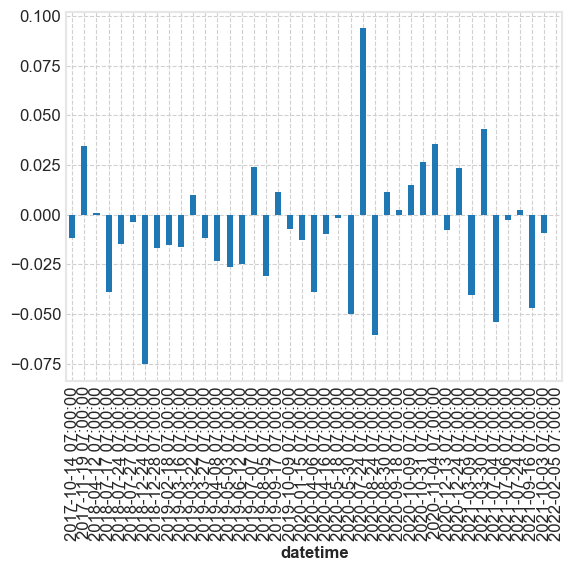

In [213]:
(df_signal['1d_ret']).plot(kind= 'bar')
plt.show()

# all 5d_ret < 0 is false signal

In [214]:
benchmark = (df_signal['close'].iloc[-1]) / (df_signal['open'].iloc[0])
print(f'benchmark return= {benchmark}')

benchmark return= -0.001005676252983839


In [161]:
df_signal.columns

Index(['open', 'close', 'action_price', 'RSI_14', 'OBV', 'OBVe_5', 'OBVe_35',
       'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15', 'MAe_5_15_diff', 'EMA_100',
       'price_over_ema', 'strength', 'vol_in', 'ma_cross', 'signal',
       'TS_Trends', 'TS_Trades', 'TS_Entries', 'TS_Exits', '1d_ret',
       'good_signal', 'trade_ret'],
      dtype='object')

In [162]:
df_ml = df_signal[['close', 'RSI_14', f'{ma_obv}', f'{ma_cross}', 'strength', 'vol_in', 'ma_cross', 'price_over_ema', 'good_signal']]

In [164]:
df_ml = df_ml.dropna()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2017-11-19 07:00:00 to 2022-02-05 07:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   close              40 non-null     float64
 1   RSI_14             40 non-null     float64
 2   MA_OBVe_5_35_diff  40 non-null     float64
 3   MAe_5_15_diff      40 non-null     float64
 4   strength           40 non-null     float64
 5   vol_in             40 non-null     float64
 6   ma_cross           40 non-null     float64
 7   price_over_ema     40 non-null     bool   
 8   good_signal        40 non-null     bool   
dtypes: bool(2), float64(7)
memory usage: 2.6 KB


In [165]:
df_ml.describe()

,close,RSI_14,MA_OBVe_5_35_diff,MAe_5_15_diff,strength,vol_in,ma_cross
count,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.0
mean,0.044542,58.983793,-1.854111,-6.014054,1.0,1.0,1.0
std,0.378659,7.031975,6.582692,24.104287,0.0,0.0,0.0
min,-0.705875,50.430895,-35.434161,-141.528870,1.0,1.0,1.0
25%,-0.000103,53.660652,-0.879516,-2.245382,1.0,1.0,1.0
50%,0.048258,57.045497,-0.241911,-0.736668,1.0,1.0,1.0
75%,0.113256,61.312218,0.222387,0.516061,1.0,1.0,1.0
max,2.054842,77.838957,2.463166,15.710783,1.0,1.0,1.0


In [181]:
len(df_signal.loc[(df_signal[f'{ma_obv}'] < -0) & (df_signal['trade_ret'] > 0)])

16

In [ ]:
len(df_encoded.loc['trade_ret'])

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [94]:
# X y เอาแค่ถึง  2020 ไม่เอา 2021 เพราะเก็บ 2021: ไปเป็น livebacktest

In [95]:
X = df_ml.loc[: '2020'].iloc[:, :-1]

In [96]:
y = df_ml.loc[: '2020'].iloc[:, -1]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 10)

In [98]:
rf = RandomForestClassifier(n_estimators= 100, max_depth= 3, random_state= 22)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [99]:
confusion_matrix(y_test, y_pred)

array([[5, 0],
       [2, 0]], dtype=int64)

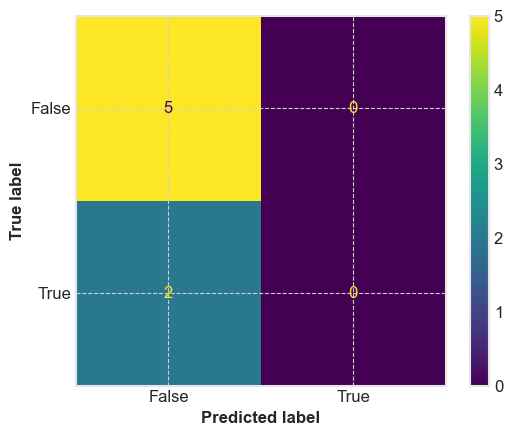

In [100]:
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

#### its a little bit the avoid false signal, 1:3 screen out,
#### but its still have 2:3 of false signal here
####### next method try to use others feature to predict false signal, because all of these feature its related to signal

In [101]:
compare = pd.DataFrame(y_test)
compare['predict'] = y_pred
compare = compare * 1

In [102]:
acc = (compare['predict'] == compare['good_signal']).sum() / len(compare)
print(f'accuracy prediction {acc} %')
# ถูก 4 จาก 16 

accuracy prediction 0.7142857142857143 %


# live_test

#### ต้องใช้signal ธรรมดามาสร้าง action เพื่อฟีลเตอร์order เข้ามาก่อน และใช้ ML เป็นตัวตัดสินใจสุดท้าย ว่าจะทำอะไร  
##### ไม่สามารถที่จะใช้ ML มากำหนด action เพียวๆในทุกวันได้

prepare data for live predict and backtest

In [103]:
df_ml.columns

Index(['close', 'RSI_14', 'MA_OBVe_5_35_diff', 'MAe_5_15_diff', 'strength',
       'vol_in', 'ma_cross', 'price_over_ema', 'good_signal'],
      dtype='object')

In [104]:
### ดึงข้อมูลในส่วนที่เป็น live test มา
df_live = df_ml.loc['2021': ]#.iloc[:]

In [105]:
df_live

,close,RSI_14,MA_OBVe_5_35_diff,MAe_5_15_diff,strength,vol_in,ma_cross,price_over_ema,good_signal
datetime,,,,,,,,,
2021-03-09 07:00:00,2.054842,62.700130,-0.843087,15.710783,1.0,1.0,1.0,True,False
2021-03-30 07:00:00,-0.016065,58.031449,-0.631707,-0.676977,1.0,1.0,1.0,True,True
2021-07-04 07:00:00,0.262016,52.731076,4.905334,0.756625,1.0,1.0,1.0,False,False
2021-07-06 07:00:00,-0.000082,52.588841,0.194797,0.181408,1.0,1.0,1.0,False,False
2021-07-24 07:00:00,-0.059311,55.582263,-0.917493,-0.268974,1.0,1.0,1.0,False,True
2021-09-16 07:00:00,0.633130,55.233956,9.130326,-0.512410,1.0,1.0,1.0,True,False
2021-10-03 07:00:00,-0.042111,56.489097,-0.909747,3.353517,1.0,1.0,1.0,True,True
2022-02-05 07:00:00,-0.118523,54.265423,0.515413,-0.130389,1.0,1.0,1.0,False,False


In [106]:
# เอาราคามา join เข้ากับ dataframe ที่มี feature (X)
df_live = df_live.join(df_signal['action_price'])

create new dataframe with only nesscesary column

In [107]:
df_live.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2021-03-09 07:00:00 to 2022-02-05 07:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   close              8 non-null      float64
 1   RSI_14             8 non-null      float64
 2   MA_OBVe_5_35_diff  8 non-null      float64
 3   MAe_5_15_diff      8 non-null      float64
 4   strength           8 non-null      float64
 5   vol_in             8 non-null      float64
 6   ma_cross           8 non-null      float64
 7   price_over_ema     8 non-null      bool   
 8   good_signal        8 non-null      bool   
 9   action_price       8 non-null      float64
dtypes: bool(2), float64(8)
memory usage: 892.0 bytes


In [108]:
#set X and y test

X_live_test = df_live.iloc[:, :-2]
y_live_test = df_live.iloc[:, -2]

In [109]:
X_live_test

,close,RSI_14,MA_OBVe_5_35_diff,MAe_5_15_diff,strength,vol_in,ma_cross,price_over_ema
datetime,,,,,,,,
2021-03-09 07:00:00,2.054842,62.700130,-0.843087,15.710783,1.0,1.0,1.0,True
2021-03-30 07:00:00,-0.016065,58.031449,-0.631707,-0.676977,1.0,1.0,1.0,True
2021-07-04 07:00:00,0.262016,52.731076,4.905334,0.756625,1.0,1.0,1.0,False
2021-07-06 07:00:00,-0.000082,52.588841,0.194797,0.181408,1.0,1.0,1.0,False
2021-07-24 07:00:00,-0.059311,55.582263,-0.917493,-0.268974,1.0,1.0,1.0,False
2021-09-16 07:00:00,0.633130,55.233956,9.130326,-0.512410,1.0,1.0,1.0,True
2021-10-03 07:00:00,-0.042111,56.489097,-0.909747,3.353517,1.0,1.0,1.0,True
2022-02-05 07:00:00,-0.118523,54.265423,0.515413,-0.130389,1.0,1.0,1.0,False


In [110]:
y_live_pred = rf.predict(X_live_test)

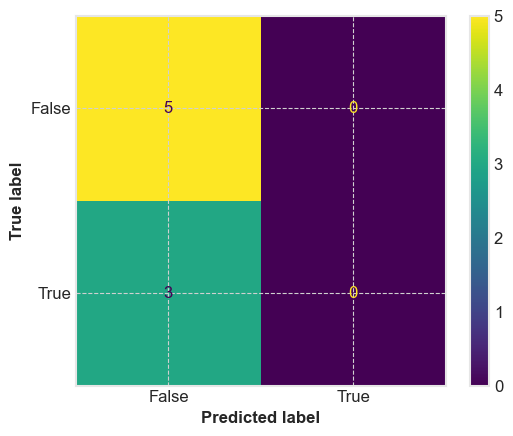

In [111]:
plot_confusion_matrix(rf, X_live_test, y_live_test)
plt.show()

prepare data for vectorbt เอาราคาทุกวันและ ค่าy ที่predict ได้มาaction เริ่มตั้งแต่วันแรกของtest data (live) เพื่อมาลองเทส

In [112]:
df_live_backtest = X_live_test
df_live_backtest['action_price'] = df_live['action_price']
df_live_backtest['predict'] = y_live_pred

#### from y_live_pred, try the original signal from y_live_test
#df_live_backtest['predict'] = y_live_test
#df_live_backtest['ret'] = df['close'].pct_change().shift(-1)
#df_live_backtest['profit'] = df_live_backtest['ret'] > 0

In [113]:
signal_vectorbt = df_live_backtest.ta.tsignals(df_live_backtest['predict'], asbool= True, append= True)
signal_vectorbt

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2021-03-09 07:00:00,False,0,False,False
2021-03-30 07:00:00,False,0,False,False
2021-07-04 07:00:00,False,0,False,False
2021-07-06 07:00:00,False,0,False,False
2021-07-24 07:00:00,False,0,False,False
2021-09-16 07:00:00,False,0,False,False
2021-10-03 07:00:00,False,0,False,False
2022-02-05 07:00:00,False,0,False,False


In [114]:
df_live_backtest.loc[df_live_backtest['TS_Trends'] == 1]

,close,RSI_14,MA_OBVe_5_35_diff,MAe_5_15_diff,strength,vol_in,ma_cross,price_over_ema,action_price,predict,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,


In [115]:
port = vbt.Portfolio.from_signals(
    df_live_backtest['action_price'],
    entries= signal_vectorbt.TS_Entries,
    exits= signal_vectorbt.TS_Exits,
    freq= '1D',
    init_cash= 100,
    fees= 0.0025,
    slippage= 0.0050
)

In [116]:
port.plot().show()

In [117]:
port.stats()

C:\Anaconda3\lib\site-packages\vectorbt\portfolio\trades.py:407: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\vectorbt\portfolio\trades.py:446: RuntimeWarning:

invalid value encountered in true_divide



Start                         2021-03-09 07:00:00
End                           2022-02-05 07:00:00
Period                            8 days 00:00:00
Start Value                                 100.0
End Value                                   100.0
Total Return [%]                              0.0
Benchmark Return [%]                    61.060679
Max Gross Exposure [%]                        0.0
Total Fees Paid                               0.0
Max Drawdown [%]                              NaN
Max Drawdown Duration                         NaT
Total Trades                                    0
Total Closed Trades                             0
Total Open Trades                               0
Open Trade P&L                                0.0
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [67]:
return_adjust_vol = port.annualized_return() / port.annualized_volatility()
print(f'return adjust vol: {return_adjust_vol}')
print(f'alpha: {port.alpha()}')

return adjust vol: nan
alpha: 0.0


<ipython-input-67-5480e407ff08>:1: RuntimeWarning:

invalid value encountered in double_scalars



In [68]:
# loc a first date of live test and use its for regular backtest with original signal with regular df

In [69]:
df_og_signal_backtest = df_encoded.loc['2021':]

In [70]:
signal_vectorbt_og = df_og_signal_backtest.ta.tsignals(df_og_signal_backtest['signal'], asbool= True, append= True)
signal_vectorbt_og

C:\Anaconda3\lib\site-packages\pandas_ta\core.py:420: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2021-02-23 07:00:00,False,0,False,False
2021-03-09 07:00:00,True,1,True,False
2021-03-22 07:00:00,False,-1,False,True
2021-03-30 07:00:00,True,1,True,False
2021-05-18 07:00:00,False,-1,False,True
2021-07-04 07:00:00,True,1,True,False
2021-07-05 07:00:00,False,-1,False,True
2021-07-06 07:00:00,True,1,True,False
2021-07-08 07:00:00,False,-1,False,True


In [71]:
signal_vectorbt_og.loc[signal_vectorbt_og['TS_Trades'] != 0]

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2021-03-09 07:00:00,True,1,True,False
2021-03-22 07:00:00,False,-1,False,True
2021-03-30 07:00:00,True,1,True,False
2021-05-18 07:00:00,False,-1,False,True
2021-07-04 07:00:00,True,1,True,False
2021-07-05 07:00:00,False,-1,False,True
2021-07-06 07:00:00,True,1,True,False
2021-07-08 07:00:00,False,-1,False,True
2021-07-24 07:00:00,True,1,True,False


In [72]:
port_og = vbt.Portfolio.from_signals(
    df_og_signal_backtest['action_price'],
    entries= signal_vectorbt_og.TS_Entries,
    exits= signal_vectorbt_og.TS_Exits,
    freq= '1D',
    init_cash= 100,
    fees= 0.0025,
    slippage= 0.0050
)

In [73]:
port_og.plot().show()

In [74]:
port_og.stats()

Start                         2021-02-23 07:00:00
End                           2022-02-05 07:00:00
Period                           16 days 00:00:00
Start Value                                 100.0
End Value                              237.220478
Total Return [%]                       137.220478
Benchmark Return [%]                    90.940493
Max Gross Exposure [%]                      100.0
Total Fees Paid                          5.977201
Max Drawdown [%]                         16.98558
Max Drawdown Duration             6 days 00:00:00
Total Trades                                    8
Total Closed Trades                             7
Total Open Trades                               1
Open Trade P&L                          -1.782119
Win Rate [%]                            42.857143
Best Trade [%]                          80.858741
Worst Trade [%]                        -11.488662
Avg Winning Trade [%]                   52.423915
Avg Losing Trade [%]                    -8.684166
